## Libraries

In [27]:
import numpy as np
import pandas as pd

from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
from sklearn.cluster import KMeans

import pickle

import matplotlib.pyplot as plt
import seaborn as sns
sns.set()

## Data Import

In [3]:
df_purchase = pd.read_csv('purchase data.csv')

   ## Data Exploration

In [4]:
df_purchase.head()

,ID,Day,Incidence,Brand,Quantity,Last_Inc_Brand,Last_Inc_Quantity,Price_1,Price_2,Price_3,...,Promotion_3,Promotion_4,Promotion_5,Sex,Marital status,Age,Education,Income,Occupation,Settlement size
0,200000001,1,0,0,0,0,0,1.59,1.87,2.01,...,0,0,0,0,0,47,1,110866,1,0
1,200000001,11,0,0,0,0,0,1.51,1.89,1.99,...,0,0,0,0,0,47,1,110866,1,0
2,200000001,12,0,0,0,0,0,1.51,1.89,1.99,...,0,0,0,0,0,47,1,110866,1,0
3,200000001,16,0,0,0,0,0,1.52,1.89,1.98,...,0,0,0,0,0,47,1,110866,1,0
4,200000001,18,0,0,0,0,0,1.52,1.89,1.99,...,0,0,0,0,0,47,1,110866,1,0


In [5]:
df_purchase.isnull().sum()

ID                   0
Day                  0
Incidence            0
Brand                0
Quantity             0
Last_Inc_Brand       0
Last_Inc_Quantity    0
Price_1              0
Price_2              0
Price_3              0
Price_4              0
Price_5              0
Promotion_1          0
Promotion_2          0
Promotion_3          0
Promotion_4          0
Promotion_5          0
Sex                  0
Marital status       0
Age                  0
Education            0
Income               0
Occupation           0
Settlement size      0
dtype: int64

## Data Segmentation

### Import Segmentation Model

In [8]:
scaler = pickle.load(open('scaler.pickle','rb'))

In [9]:
pca = pickle.load(open('pca.pickle', 'rb'))

In [10]:
kmeans_pca = pickle.load(open('kmeans_pca.pickle', 'rb'))

### Standardization

In [12]:
features = df_purchase[['Sex','Marital status','Age','Education','Income','Occupation','Settlement size']]
df_purchase_segm_std = scaler.transform(features)

### PCA

In [14]:
df_purchase_segm_pca = pca.transform(df_purchase_segm_std)

### K-means PCA

In [15]:
purchase_segm_kmeans_pca = kmeans_pca.predict(df_purchase_segm_pca)

In [16]:
df_purchase_predictors = df_purchase.copy()

In [17]:
df_purchase_predictors['Segment'] = purchase_segm_kmeans_pca

## Descriptive Analysis by Segments

### Data Analysis by Customer

In [19]:
df_purchase_predictors.head()

,ID,Day,Incidence,Brand,Quantity,Last_Inc_Brand,Last_Inc_Quantity,Price_1,Price_2,Price_3,...,Promotion_4,Promotion_5,Sex,Marital status,Age,Education,Income,Occupation,Settlement size,Segment
0,200000001,1,0,0,0,0,0,1.59,1.87,2.01,...,0,0,0,0,47,1,110866,1,0,0
1,200000001,11,0,0,0,0,0,1.51,1.89,1.99,...,0,0,0,0,47,1,110866,1,0,0
2,200000001,12,0,0,0,0,0,1.51,1.89,1.99,...,0,0,0,0,47,1,110866,1,0,0
3,200000001,16,0,0,0,0,0,1.52,1.89,1.98,...,0,0,0,0,47,1,110866,1,0,0
4,200000001,18,0,0,0,0,0,1.52,1.89,1.99,...,0,0,0,0,47,1,110866,1,0,0


In [20]:
temp1 = df_purchase_predictors[['ID', 'Incidence']].groupby(['ID'], as_index = False).count()
temp1 = temp1.set_index('ID')
temp1 = temp1.rename(columns = {'Incidence':'N_Visits'})
temp1.head()

,N_Visits
ID,
200000001,101
200000002,87
200000003,97
200000004,85
200000005,111


In [21]:
temp2 = df_purchase_predictors[['ID', 'Incidence']].groupby(['ID'], as_index = False).sum()
temp2 = temp2.set_index('ID')
temp2 = temp2.rename(columns = {'Incidence':'N_Purchases'})
temp3 = temp1.join(temp2)
temp3.head()

,N_Visits,N_Purchases
ID,,
200000001,101,9
200000002,87,11
200000003,97,10
200000004,85,11
200000005,111,13


In [22]:
temp3['Average_N_Purchases'] = temp3['N_Purchases'] / temp3['N_Visits']
temp3.head()

,N_Visits,N_Purchases,Average_N_Purchases
ID,,,
200000001,101,9,0.089109
200000002,87,11,0.126437
200000003,97,10,0.103093
200000004,85,11,0.129412
200000005,111,13,0.117117


In [23]:
temp4 = df_purchase_predictors[['ID', 'Segment']].groupby(['ID'], as_index = False).mean()
temp4 = temp4.set_index('ID')
df_purchase_descr = temp3.join(temp4)

In [24]:
df_purchase_descr.head()

,N_Visits,N_Purchases,Average_N_Purchases,Segment
ID,,,,
200000001,101,9,0.089109,0
200000002,87,11,0.126437,3
200000003,97,10,0.103093,0
200000004,85,11,0.129412,0
200000005,111,13,0.117117,1


In [26]:
segm_prop = df_purchase_descr[['N_Purchases','Segment']].groupby(['Segment']).count() / df_purchase_descr.shape[0]
segm_prop = segm_prop.rename(columns = {'N_Purchases':'Segment Proportions'})
segm_prop.head()

,Segment Proportions
Segment,
0,0.378
1,0.222
2,0.206
3,0.194


Text(0.5, 1.0, 'Segment Proportions')

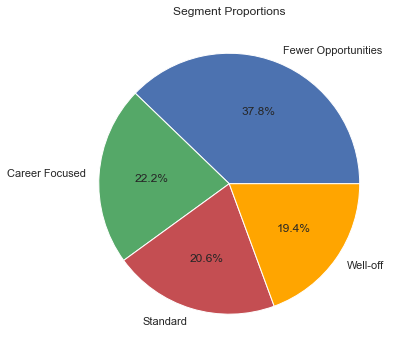

In [28]:
plt.figure(figsize = (9,6))
plt.pie(segm_prop['Segment Proportions'],
       labels = ['Fewer Opportunities','Career Focused','Standard','Well-off'],
       autopct = '%1.1f%%',
       colors = ('b','g','r','orange'))
plt.title('Segment Proportions')

### Purchase Occasion and Purchase Incidence

In [29]:
segments_mean = df_purchase_descr.groupby(['Segment']).mean()
segments_mean

,N_Visits,N_Purchases,Average_N_Purchases
Segment,,,
0,113.894180,22.793651,0.201679
1,123.216216,39.603604,0.281944
2,117.699029,24.902913,0.212773
3,117.185567,34.731959,0.285639


In [30]:
segments_std = df_purchase_descr.groupby(['Segment']).std()

Text(0.5, 1.0, 'Average Number of Store Visits by Segments')

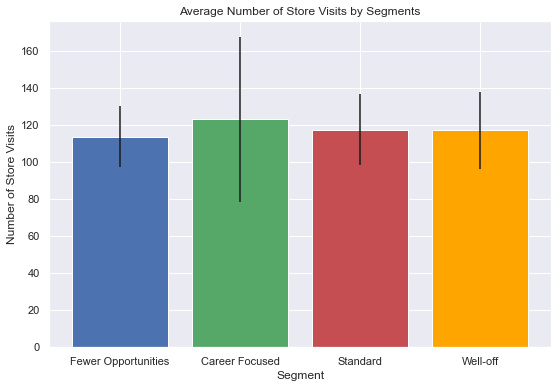

In [32]:
plt.figure(figsize =(9,6))
plt.bar(x = (0,1,2,3),
       tick_label = ('Fewer Opportunities','Career Focused','Standard','Well-off'),
       height = segments_mean['N_Visits'],
       yerr = segments_std['N_Visits'],
       color = ('b','g','r','orange'))
plt.xlabel('Segment')
plt.ylabel('Number of Store Visits')
plt.title('Average Number of Store Visits by Segments')

Text(0.5, 1.0, 'Number of Purchases by Segments')

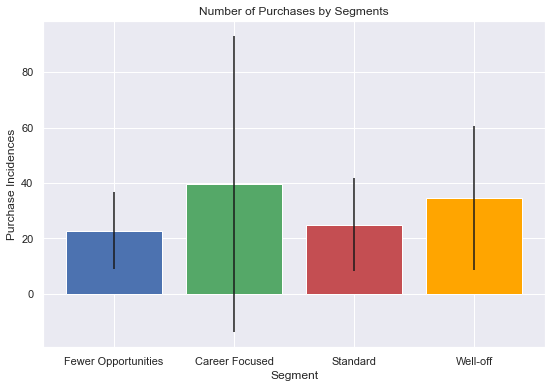

In [33]:
plt.figure(figsize =(9,6))
plt.bar(x = (0,1,2,3),
       tick_label = ('Fewer Opportunities','Career Focused','Standard','Well-off'),
       height = segments_mean['N_Purchases'],
       yerr = segments_std['N_Purchases'],
       color = ('b','g','r','orange'))
plt.xlabel('Segment')
plt.ylabel('Purchase Incidences')
plt.title('Number of Purchases by Segments')

### Brand Choice

In [34]:
df_purchase_incidence = df_purchase_predictors[df_purchase_predictors['Incidence'] == 1]

In [35]:
brand_dummies = pd.get_dummies(df_purchase_incidence['Brand'], prefix = 'Brand', prefix_sep = '_')
brand_dummies['Segment'], brand_dummies['ID'] = df_purchase_incidence['Segment'], df_purchase_incidence['ID']
brand_dummies

,Brand_1,Brand_2,Brand_3,Brand_4,Brand_5,Segment,ID
6,0,1,0,0,0,0,200000001
11,0,0,0,0,1,0,200000001
19,1,0,0,0,0,0,200000001
24,0,0,0,1,0,0,200000001
29,0,1,0,0,0,0,200000001
...,...,...,...,...,...,...,...
58621,0,1,0,0,0,0,200000500
58648,1,0,0,0,0,0,200000500
58674,0,1,0,0,0,0,200000500
58687,0,1,0,0,0,0,200000500


In [36]:
temp = brand_dummies.groupby(['ID'], as_index = True).mean()

In [37]:
mean_brand_choice = temp.groupby(['Segment'], as_index = True).mean()

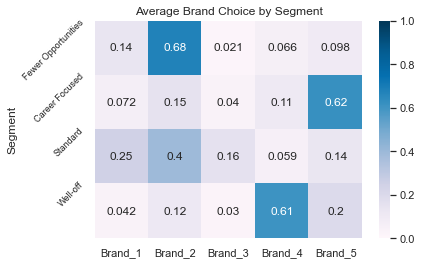

In [38]:
sns.heatmap(mean_brand_choice,
           vmin = 0,
           vmax = 1,
           cmap = 'PuBu',
           annot = True)
plt.yticks([0,1,2,3],['Fewer Opportunities','Career Focused','Standard','Well-off'], rotation = 45, fontsize = 9)
plt.title('Average Brand Choice by Segment')
plt.show()

### Revenue

In [39]:
temp = df_purchase_predictors[df_purchase_predictors['Brand'] == 1]
temp.loc[:, 'Revenue Brand 1'] = temp['Price_1'] * temp['Quantity']
segments_brand_revenue = pd.DataFrame()
segments_brand_revenue[['Segment', 'Revenue Brand 1']] = temp[['Segment', 'Revenue Brand 1']].groupby(['Segment'], as_index = False).sum()
segments_brand_revenue

/Users/absharm/opt/anaconda3/lib/python3.8/site-packages/pandas/core/indexing.py:1596: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self.obj[key] = _infer_fill_value(value)
/Users/absharm/opt/anaconda3/lib/python3.8/site-packages/pandas/core/indexing.py:1745: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  isetter(ilocs[0], value)


,Segment,Revenue Brand 1
0,0,2258.90
1,1,736.09
2,2,2611.19
3,3,699.47


In [40]:
temp = df_purchase_predictors[df_purchase_predictors['Brand'] == 2]
temp.loc[:, 'Revenue Brand 2'] = temp['Price_2'] * temp['Quantity']
segments_brand_revenue[['Segment', 'Revenue Brand 2']] = temp[['Segment', 'Revenue Brand 2']].groupby(['Segment'], as_index = False).sum()


/Users/absharm/opt/anaconda3/lib/python3.8/site-packages/pandas/core/indexing.py:1596: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self.obj[key] = _infer_fill_value(value)
/Users/absharm/opt/anaconda3/lib/python3.8/site-packages/pandas/core/indexing.py:1745: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  isetter(ilocs[0], value)


In [42]:
temp = df_purchase_predictors[df_purchase_predictors['Brand'] == 3]
temp.loc[:, 'Revenue Brand 3'] = temp['Price_3'] * temp['Quantity']
segments_brand_revenue[['Segment', 'Revenue Brand 3']] = temp[['Segment', 'Revenue Brand 3']].groupby(['Segment'], as_index = False).sum()

/Users/absharm/opt/anaconda3/lib/python3.8/site-packages/pandas/core/indexing.py:1596: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self.obj[key] = _infer_fill_value(value)
/Users/absharm/opt/anaconda3/lib/python3.8/site-packages/pandas/core/indexing.py:1745: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  isetter(ilocs[0], value)


In [43]:
temp = df_purchase_predictors[df_purchase_predictors['Brand'] == 4]
temp.loc[:, 'Revenue Brand 4'] = temp['Price_4'] * temp['Quantity']
segments_brand_revenue[['Segment', 'Revenue Brand 4']] = temp[['Segment', 'Revenue Brand 4']].groupby(['Segment'], as_index = False).sum()

/Users/absharm/opt/anaconda3/lib/python3.8/site-packages/pandas/core/indexing.py:1596: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self.obj[key] = _infer_fill_value(value)
/Users/absharm/opt/anaconda3/lib/python3.8/site-packages/pandas/core/indexing.py:1745: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  isetter(ilocs[0], value)


In [44]:
temp = df_purchase_predictors[df_purchase_predictors['Brand'] == 5]
temp.loc[:, 'Revenue Brand 5'] = temp['Price_5'] * temp['Quantity']
segments_brand_revenue[['Segment', 'Revenue Brand 5']] = temp[['Segment', 'Revenue Brand 5']].groupby(['Segment'], as_index = False).sum()

/Users/absharm/opt/anaconda3/lib/python3.8/site-packages/pandas/core/indexing.py:1596: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self.obj[key] = _infer_fill_value(value)
/Users/absharm/opt/anaconda3/lib/python3.8/site-packages/pandas/core/indexing.py:1745: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  isetter(ilocs[0], value)


In [46]:
segments_brand_revenue['Total Revenue'] = (segments_brand_revenue['Revenue Brand 1'] +
                                         segments_brand_revenue['Revenue Brand 2'] +
                                         segments_brand_revenue['Revenue Brand 3'] +
                                         segments_brand_revenue['Revenue Brand 4'] +
                                         segments_brand_revenue['Revenue Brand 5'])
segments_brand_revenue

,Segment,Revenue Brand 1,Revenue Brand 2,Revenue Brand 3,Revenue Brand 4,Revenue Brand 5,Total Revenue
0,0,2258.90,13909.78,722.06,1805.59,2214.82,20911.15
1,1,736.09,1791.78,664.75,2363.84,19456.74,25013.20
2,2,2611.19,4768.52,3909.17,861.38,2439.75,14590.01
3,3,699.47,1298.23,725.54,14009.29,5509.69,22242.22


In [47]:
segments_brand_revenue['Segment Proportions'] = segm_prop['Segment Proportions']
segments_brand_revenue['Segment'] = segments_brand_revenue['Segment'].map({0:'Fewer Opportunities',
                                                                          1:'Career Focused',
                                                                          2:'Standard',
                                                                          3:'Well-off'})
segments_brand_revenue = segments_brand_revenue.set_index(['Segment'])
segments_brand_revenue

,Revenue Brand 1,Revenue Brand 2,Revenue Brand 3,Revenue Brand 4,Revenue Brand 5,Total Revenue,Segment Proportions
Segment,,,,,,,
Fewer Opportunities,2258.90,13909.78,722.06,1805.59,2214.82,20911.15,0.378
Career Focused,736.09,1791.78,664.75,2363.84,19456.74,25013.20,0.222
Standard,2611.19,4768.52,3909.17,861.38,2439.75,14590.01,0.206
Well-off,699.47,1298.23,725.54,14009.29,5509.69,22242.22,0.194
